In [1]:

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
from PIL import Image
import os

dataset_dir = "DATASET/TRAIN"
def remove_corrupted_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('jpg', 'jpeg', 'png')):
                try:
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path)
                    img.verify()
                except Exception as e:
                    print(f"❌ Removing corrupted: {img_path}")
                    os.remove(img_path)

remove_corrupted_images("DATASET/TRAIN")
remove_corrupted_images("DATASET/TEST")


In [3]:

train_dir = "DATASET/TRAIN"
test_dir = "DATASET/TEST"




In [4]:

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 866 images belonging to 5 classes.
Found 215 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [5]:
# ============================================
# 🧠 STEP 4: BUILD THE CNN MODEL
# ============================================
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
# ============================================
# 🚀 STEP 5: TRAIN THE MODEL
# ============================================
EPOCHS = 20

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/20


C:\Users\Aditya Chaudhari\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


28/28 [==============================] - 14s 356ms/step - loss: 1.6718 - accuracy: 0.2575 - val_loss: 1.5905 - val_accuracy: 0.2837
Epoch 2/20
28/28 [==============================] - 10s 349ms/step - loss: 1.5904 - accuracy: 0.2552 - val_loss: 1.5486 - val_accuracy: 0.3349
Epoch 3/20
28/28 [==============================] - 9s 318ms/step - loss: 1.5694 - accuracy: 0.3025 - val_loss: 1.5506 - val_accuracy: 0.3488
Epoch 4/20
28/28 [==============================] - 9s 316ms/step - loss: 1.4888 - accuracy: 0.3649 - val_loss: 1.3618 - val_accuracy: 0.4558
Epoch 5/20
28/28 [==============================] - 9s 311ms/step - loss: 1.3974 - accuracy: 0.4261 - val_loss: 1.3485 - val_accuracy: 0.4884
Epoch 6/20
28/28 [==============================] - 9s 314ms/step - loss: 1.3587 - accuracy: 0.4550 - val_loss: 1.2844 - val_accuracy: 0.5302
Epoch 7/20
28/28 [==============================] - 9s 305ms/step - loss: 1.3187 - accuracy: 0.4815 - val_loss: 1.2151 - val_accuracy: 0.5023
Epoch 8/20
28/2

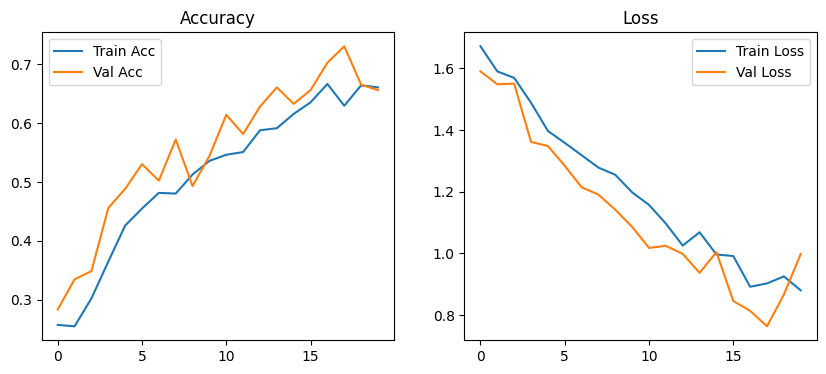

In [7]:
# ============================================
# 📈 STEP 6: VISUALIZE TRAINING PERFORMANCE
# ============================================
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [8]:
# ============================================
# 🧪 STEP 7: EVALUATE ON TEST DATA
# ============================================
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


15/15 [==============================] - 6s 420ms/step - loss: 0.6983 - accuracy: 0.7681
Test Accuracy: 76.81%


In [9]:
# ============================================
# 🔮 STEP 8: MAKE PREDICTIONS
# ============================================
labels = list(train_generator.class_indices.keys())

from tensorflow.keras.preprocessing import image

def predict_pose(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    print(f"Predicted Pose: {predicted_class} ({confidence*100:.2f}%)")

# Example:
# predict_pose("/content/yoga/test/tree/xyz.jpg")


In [10]:
# ============================================
# 💾 STEP 9: SAVE MODEL
# ============================================
model.save("yoga_pose_model.h5")
print("✅ Model saved as yoga_pose_model.h5")


✅ Model saved as yoga_pose_model.h5


In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import os

# Define the same class order as your training generator
CLASS_NAMES = ['downdog', 'goddess', 'plank', 'tree', 'warrior']

def predict_yoga_pose(model, img_path, img_size=(224, 224)):
    """
    Predict the yoga pose for a single input image.
    
    Args:
        model: Trained Keras model
        img_path: Path to the input image
        img_size: Tuple for resizing (same as used in training)
        
    Returns:
        dict: { 'predicted_class': str, 'confidence': float, 'all_probabilities': dict }
    """
    try:
        # Load image
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        preds = model.predict(img_array)
        pred_idx = np.argmax(preds[0])
        pred_class = CLASS_NAMES[pred_idx]
        confidence = float(np.max(preds[0]))

        return {
            'predicted_class': pred_class,
            'confidence': round(confidence * 100, 2),
            'all_probabilities': {CLASS_NAMES[i]: round(float(preds[0][i]), 4) for i in range(len(CLASS_NAMES))}
        }

    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        return None


In [13]:
# Load your trained model
model = tf.keras.models.load_model("yoga_pose_model.h5")

# Predict one test image
result = predict_yoga_pose(model, "WIN_20251018_12_48_59_Pro.jpg", img_size=IMG_SIZE)

print("🧘 Predicted Pose:", result['predicted_class'])
print("🎯 Confidence:", result['confidence'], "%")
print("📊 All Probabilities:", result['all_probabilities'])


1/1 [==============================] - 0s 67ms/step
🧘 Predicted Pose: goddess
🎯 Confidence: 34.21 %
📊 All Probabilities: {'downdog': 0.1906, 'goddess': 0.3421, 'plank': 0.2914, 'tree': 0.052, 'warrior': 0.1239}
